# Lab3: Naive Bayes

### Дабеска Мила 193263

&nbsp;

In [5]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sn
import matplotlib.pyplot as plt
from pomegranate import *
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
dataset=pd.read_csv('history-of-rock-spotify.csv')
dataset.drop(['index', 'danceability.1'], axis=1, inplace = True)
dataset.set_index('name', inplace=True)
dataset

,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,,
Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357
Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734


In [7]:
dataset_encoded = dataset.apply(LabelEncoder().fit_transform)
dataset_encoded.head()

# dataset_encoded =  LabelEncoder()
# X['artist'] = dataset_encoded.fit_transform(X['artist'])
# X.head()

,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,,
Smells Like Teen Spirit,942,35,3827,74,363,101,752,925,1,599,3630,332,2084,3,708
Stairway to Heaven - Remaster,772,15,4639,78,199,2350,186,1476,9,609,684,107,321,3,185
Bohemian Rhapsody - Remastered 2011,1045,19,4316,74,253,2085,243,0,0,736,1252,304,4010,3,216
Imagine - Remastered 2010,704,15,995,77,408,2602,116,2284,0,530,618,20,90,3,157
(I Can't Get No) Satisfaction - Mono Version,1516,9,1949,77,584,1484,703,1941,2,621,2061,106,3613,3,919


In [8]:
features = dataset.columns.drop(['key'])
labels = ['key']

# X = dataset[features]
# Y = dataset[labels]

In [9]:
trainX,testX,trainY,testY = train_test_split(dataset_encoded[features], dataset_encoded[labels], test_size=0.2)

In [10]:
type(trainY)

pandas.core.frame.DataFrame

In [11]:
model = GaussianNB()
model.fit(trainX, trainY)

GaussianNB()

In [12]:
predicted = model.predict(testX)

In [13]:
result_df = pd.DataFrame({"actual":testY.key,"predicted":predicted})
result_df

,actual,predicted
name,,
Rosalita (Come Out Tonight),5,9
"Meet Me Half Way - From ""Over The Top"" Soundtrack",4,7
Whiskey In The Jar,7,9
Soul Love - 2012 Remaster,2,7
Fireball - 1996 Remaster,6,9
...,...,...
This Time,2,7
Yellow Submarine - Remastered 2009,1,0
How Good It Can Get,9,2


In [14]:
confusion_matrix = pd.crosstab(result_df['actual'], result_df['predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1,2,3,4,5,6,7,8,9,11
Actual,,,,,,,,,,,
0,36,10,15,3,0,8,2,21,1,47,6
1,13,12,6,1,1,5,3,5,3,22,4
2,37,14,11,5,0,7,3,14,1,60,7
3,3,3,4,1,1,1,1,2,1,6,0
4,18,12,4,2,3,5,2,13,1,41,2
5,17,7,4,2,0,6,2,10,1,27,4
6,6,6,6,3,0,0,1,8,3,26,7
7,20,9,8,3,3,5,2,14,4,52,5
8,4,7,3,0,0,1,2,2,1,22,2


In [15]:
loo = LeaveOneOut()

X = dataset_encoded[features].to_numpy()
y = dataset_encoded[labels].to_numpy()

predicted = []
actual = []

for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(trainX,trainY.squeeze())
        predicted_value = model.predict(X_test)
        predicted.append(predicted_value[0])
        actual.append(y_test[0][0])

print(predicted)
print(actual)

fig = plt.figure(figsize=(20,20))
result_df = pd.DataFrame({"actual":actual, "predicted":predicted})
conf_matrix = pd.crosstab(result_df['actual'], result_df['predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_matrix, annot=True)
plt.show()

KeyboardInterrupt: 

In [12]:
print(f"accuracy: {accuracy_score(actual, predicted)}")
print(f"\nprecision: {precision_score(actual, predicted, average='micro')}")
print(f"\nrecall: {recall_score(actual, predicted, average='micro')}")
print(f"\nf1: {f1_score(actual, predicted, average='micro')}")

accuracy: 0.14897884755652807

precision: 0.14897884755652807

recall: 0.14897884755652807

f1: 0.14897884755652807


In [13]:
scores = cross_validate(model, X, y, cv=5, scoring="f1_macro")
scores

{'fit_time': array([0.00874829, 0.00800419, 0.00699472, 0.00750136, 0.0060029 ]),
 'score_time': array([0.00700092, 0.00700188, 0.00763035, 0.00652909, 0.00698829]),
 'test_score': array([0.06772882, 0.09751591, 0.08250285, 0.07906006, 0.09407308])}

In [14]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [15]:
conf_mat = confusion_matrix(y, y_pred)

TypeError: 'DataFrame' object is not callable

In [16]:
sn.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)

NameError: name 'conf_mat' is not defined

<AxesSubplot:>

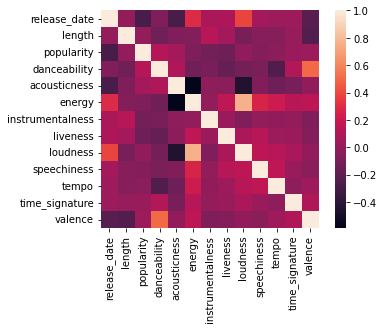

In [17]:
cormat = pd.DataFrame(dataset, columns=features).corr()
sn.heatmap(round(cormat,2), square=True, cbar=True)

In [18]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

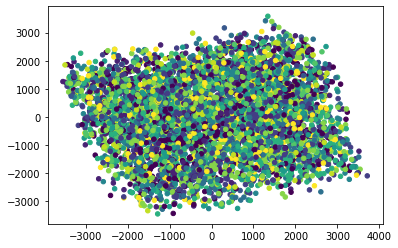

In [19]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20)

In [20]:
dataset = dataset.drop(columns=['artist'])

Несакаше да се изврши

In [ ]:
model = BayesianNetwork.from_samples(dataset.to_numpy(), state_names=dataset.columns.values, algorithm='chow-liu')

In [ ]:
model.plot()

In [ ]:
model.sample()